In [19]:
# module import
import numpy as np
from tensorflow.keras.layers import Input, Dense, LSTM, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [14]:
# create Data
def createData(X_data, step):
    m = np.arange(len(X_data) - step)

    x, y = [], []
    for i in m:
        a = X_data[i:i+step]
        x.append(a)
        b = X_data[i+1:i+1+step]
        y.append(b[-1])

    X = np.array(x).reshape([len(m), step, 1])
    Y = np.array(y).reshape([len(m), 1])
    return X, Y

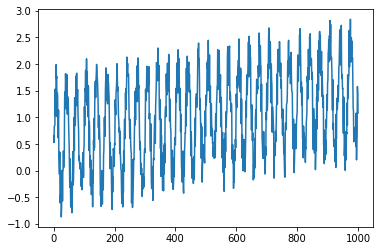

In [20]:
# 시계열 sine 데이터 생성
data = np.arange(1001)*0.001 + np.sin(2*np.pi*0.03*np.arange(1001)) + np.random.random(1001)
plt.plot(data)

In [21]:
# 파라미터 설정
n_input = 1 # input feature
n_output = 1 # output feature
n_step = int(input('시계열 step 주기를 설정하세요: '))
n_hidden = int(input('FFN 히든 뉴런의 개수를 설정하세요: '))

시계열 step 주기를 설정하세요: 20
FFN 히든 뉴런의 개수를 설정하세요: 50


In [22]:
# 학습 데이터 생성
x, y = createData(data, n_step)

In [26]:
# LSTM 모델 생성
x_Input = Input(batch_shape=(None, n_step, n_input))
x_Lstm = Bidirectional(LSTM(n_hidden), merge_mode='concat')(x_Input)
y_output = Dense(n_output)(x_Lstm)
model = Model(x_Input, y_output)
latent = Model(x_Input, x_Lstm)
latent_feature = latent.predict(x[0].reshape(1, 20, 1))
print(f"latent feature 확인: {latent_feature}") # (1, 100)이 된다. 

model.compile(loss='mse', optimizer=Adam(lr=0.01))
print(model.summary())

latent feature 확인: [[-0.012067    0.01966276 -0.05664309  0.0931647   0.14561117 -0.03945103
  -0.0742237   0.09113867  0.03184458  0.00788608 -0.1097935  -0.04274286
   0.07805162 -0.03945215  0.11814064 -0.05782815  0.00915887 -0.02726699
  -0.02324179 -0.04687942  0.03634013 -0.00309777 -0.09427729  0.06134911
   0.04108642  0.09175215  0.07887352 -0.06539207 -0.07966749 -0.04920456
   0.02676703 -0.09426849 -0.02888104  0.00424632  0.0447416  -0.01979725
   0.03367798  0.0942317   0.09334462 -0.04984967 -0.02496288 -0.03977196
   0.04401926  0.08106794 -0.01805672 -0.06747185 -0.06623743  0.01231443
   0.02352381 -0.06948927  0.14730962 -0.04842576 -0.1042531   0.08367456
   0.15908395 -0.02008335  0.09104782  0.0772751  -0.02132207 -0.01222789
   0.1201592   0.03964946  0.03467934 -0.08007045  0.05752417  0.05187177
   0.19343135  0.01474496  0.0799617   0.03984673  0.17015417 -0.06743573
   0.08258685 -0.01907674 -0.07858144  0.02033101 -0.01108614  0.01610789
  -0.0929819   0.02

In [29]:
# 학습
EPOCHS = int(input('학습 횟수를 설정하세요.: '))
BATCH = int(input('배치 사이즈를 설정하세요.: '))

hist = model.fit(x, y,
                 epochs=EPOCHS,
                 shuffle=True,
                 batch_size=BATCH)

학습 횟수를 설정하세요.: 100
배치 사이즈를 설정하세요.: 100
Epoch 1/100
10/10 [==============================] - 0s 22ms/step - loss: 0.4671
Epoch 2/100
10/10 [==============================] - 0s 22ms/step - loss: 0.1323
Epoch 3/100
10/10 [==============================] - 0s 24ms/step - loss: 0.1231
Epoch 4/100
10/10 [==============================] - 0s 20ms/step - loss: 0.1176
Epoch 5/100
10/10 [==============================] - 0s 20ms/step - loss: 0.1143
Epoch 6/100
10/10 [==============================] - 0s 22ms/step - loss: 0.1146
Epoch 7/100
10/10 [==============================] - 0s 20ms/step - loss: 0.1124
Epoch 8/100
10/10 [==============================] - 0s 19ms/step - loss: 0.1125
Epoch 9/100
10/10 [==============================] - 0s 20ms/step - loss: 0.1132
Epoch 10/100
10/10 [==============================] - 0s 20ms/step - loss: 0.1094
Epoch 11/100
10/10 [==============================] - 0s 21ms/step - loss: 0.1111
Epoch 12/100
10/10 [==============================] - 0s 21ms/step -

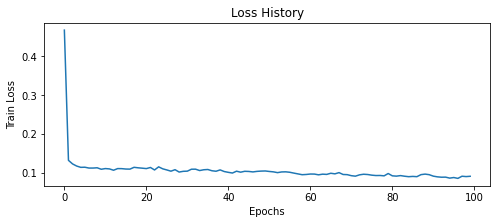

In [31]:
# plot loss history
plt.figure(figsize=(8, 3))
plt.plot(hist.history['loss'])
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Train Loss')
plt.show()

In [30]:
# 예측
n_future = int(input('예측하고자 하는 기간을 설정하세요.: '))

# 마지막 100개 데이터 활용
if len(data) > 100:
    last_data = np.copy(data[-100:])
else:
    last_data = np.copy(data)

X_pred = np.copy(last_data)
estimate = [X_pred[-1]]

# 예측
for _ in range(n_future):
    x = X_pred[-n_step:].reshape(1, n_step, 1) # 마지막에 들어가기 위해서
    y_hat = model.predict(x)[0][0]
    estimate.append(y_hat)
    X_pred = np.insert(X_pred, len(X_pred), y_hat)

예측하고자 하는 기간을 설정하세요.: 20


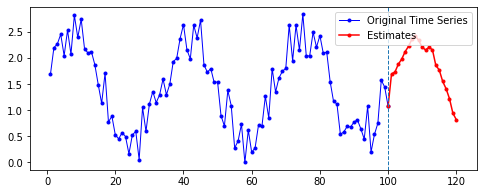

In [33]:
ax1 = np.arange(1, len(last_data)+1)
ax2 = np.arange(len(last_data), len(last_data) + len(estimate))
plt.figure(figsize=(8, 3))
plt.plot(ax1, last_data, 'b-o', color='blue', markersize=3, label='Original Time Series', linewidth=1)
plt.plot(ax2, estimate, 'b-o', color='red', markersize=3, label='Estimates')
plt.axvline(x=ax1[-1], linestyle='dashed', linewidth=1)
plt.legend()
plt.show()

여기서는 concat 방법을 바꿔보자.


sum

시계열 step 주기를 설정하세요: 20
FFN 히든 뉴런의 개수를 설정하세요: 50
latent feature 확인: [[ 0.0667605  -0.09118942  0.03831644  0.11831568  0.02250899 -0.14428695
   0.2838036  -0.00947045  0.02285669  0.23253447  0.05048008 -0.07622133
   0.15616484 -0.08253232 -0.07723607  0.17417306 -0.17827588 -0.20580651
  -0.08528456 -0.18768737  0.07976644  0.1413792  -0.0207923   0.02966681
  -0.10581945 -0.0057453   0.1312169  -0.08853251 -0.00760126  0.14778346
  -0.17355862 -0.03268392 -0.04757433 -0.11530007  0.17096373  0.15591335
   0.16515517 -0.03721415 -0.06482172 -0.17701206  0.0474056   0.00371088
   0.06234185 -0.0911707   0.09997956  0.05587403  0.08033182  0.00551012
  -0.02295355 -0.11773385]]
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 20, 1)]           0         
_________________________________________________________________
bidirectional_4 (Bidirection (No

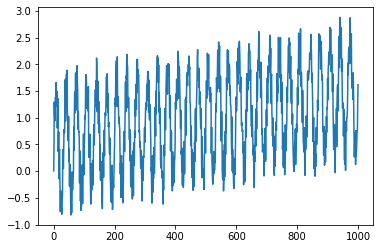

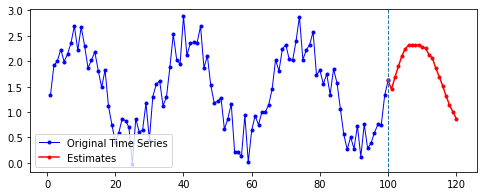

In [34]:
# module import
import numpy as np
from tensorflow.keras.layers import Input, Dense, LSTM, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# create Data
def createData(X_data, step):
    m = np.arange(len(X_data) - step)

    x, y = [], []
    for i in m:
        a = X_data[i:i+step]
        x.append(a)
        b = X_data[i+1:i+1+step]
        y.append(b[-1])

    X = np.array(x).reshape([len(m), step, 1])
    Y = np.array(y).reshape([len(m), 1])
    return X, Y

# 시계열 sine 데이터 생성
data = np.arange(1001)*0.001 + np.sin(2*np.pi*0.03*np.arange(1001)) + np.random.random(1001)
plt.plot(data)

# 파라미터 설정
n_input = 1 # input feature
n_output = 1 # output feature
n_step = int(input('시계열 step 주기를 설정하세요: '))
n_hidden = int(input('FFN 히든 뉴런의 개수를 설정하세요: '))

# 학습 데이터 생성
x, y = createData(data, n_step)

# LSTM 모델 생성
x_Input = Input(batch_shape=(None, n_step, n_input))
x_Lstm = Bidirectional(LSTM(n_hidden), merge_mode='sum')(x_Input)
y_output = Dense(n_output)(x_Lstm)
model = Model(x_Input, y_output)
latent = Model(x_Input, x_Lstm)
latent_feature = latent.predict(x[0].reshape(1, 20, 1))
print(f"latent feature 확인: {latent_feature}") # (1, 100)이 된다. 

model.compile(loss='mse', optimizer=Adam(lr=0.01))
print(model.summary())

# 학습
EPOCHS = int(input('학습 횟수를 설정하세요.: '))
BATCH = int(input('배치 사이즈를 설정하세요.: '))

hist = model.fit(x, y,
                 epochs=EPOCHS,
                 shuffle=True,
                 batch_size=BATCH)

# 예측
n_future = int(input('예측하고자 하는 기간을 설정하세요.: '))

# 마지막 100개 데이터 활용
if len(data) > 100:
    last_data = np.copy(data[-100:])
else:
    last_data = np.copy(data)

X_pred = np.copy(last_data)
estimate = [X_pred[-1]]

# 예측
for _ in range(n_future):
    x = X_pred[-n_step:].reshape(1, n_step, 1) # 마지막에 들어가기 위해서
    y_hat = model.predict(x)[0][0]
    estimate.append(y_hat)
    X_pred = np.insert(X_pred, len(X_pred), y_hat)

    ax1 = np.arange(1, len(last_data)+1)
ax2 = np.arange(len(last_data), len(last_data) + len(estimate))
plt.figure(figsize=(8, 3))
plt.plot(ax1, last_data, 'b-o', color='blue', markersize=3, label='Original Time Series', linewidth=1)
plt.plot(ax2, estimate, 'b-o', color='red', markersize=3, label='Estimates')
plt.axvline(x=ax1[-1], linestyle='dashed', linewidth=1)
plt.legend()
plt.show()

시계열 step 주기를 설정하세요: 20
FFN 히든 뉴런의 개수를 설정하세요: 50
latent feature 확인: [[-5.95147256e-03 -1.18719544e-02 -2.38901358e-02  9.94508527e-03
   5.08811572e-05 -5.70906093e-03  4.67419531e-03 -1.65201118e-03
  -4.51043574e-03 -5.82887384e-04 -3.16372345e-04 -3.83169530e-03
   2.80541810e-03 -1.25080929e-04  1.20148959e-03 -6.53844466e-03
   1.13715064e-02 -5.45839546e-03 -6.27940940e-03 -4.03163349e-03
  -2.66488898e-03  1.39869563e-03 -1.38236955e-02 -1.46356961e-02
   1.22078545e-02  7.54860230e-03  2.32500792e-03  7.18903216e-03
   7.81472214e-03 -8.27002432e-03  7.12686044e-04 -2.66682357e-03
   2.67906999e-03 -1.90682784e-02  9.01597645e-03  5.44243609e-04
  -1.08584529e-02  1.88384706e-03  3.88034503e-04  7.77664082e-03
  -1.39232143e-03  1.13096216e-03  3.82889673e-04 -3.81989195e-03
  -1.08973328e-02 -1.19420572e-03  4.50115796e-04 -5.16672898e-03
   1.63993996e-03 -3.56852286e-03]]
Model: "model_5"
_________________________________________________________________
Layer (type)          

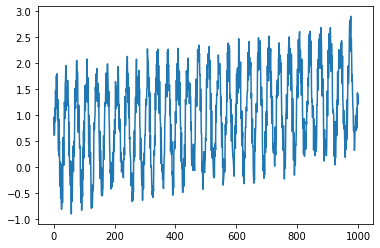

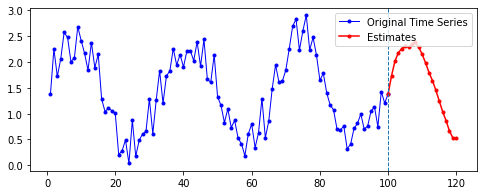

In [35]:
# module import
import numpy as np
from tensorflow.keras.layers import Input, Dense, LSTM, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# create Data
def createData(X_data, step):
    m = np.arange(len(X_data) - step)

    x, y = [], []
    for i in m:
        a = X_data[i:i+step]
        x.append(a)
        b = X_data[i+1:i+1+step]
        y.append(b[-1])

    X = np.array(x).reshape([len(m), step, 1])
    Y = np.array(y).reshape([len(m), 1])
    return X, Y

# 시계열 sine 데이터 생성
data = np.arange(1001)*0.001 + np.sin(2*np.pi*0.03*np.arange(1001)) + np.random.random(1001)
plt.plot(data)

# 파라미터 설정
n_input = 1 # input feature
n_output = 1 # output feature
n_step = int(input('시계열 step 주기를 설정하세요: '))
n_hidden = int(input('FFN 히든 뉴런의 개수를 설정하세요: '))

# 학습 데이터 생성
x, y = createData(data, n_step)

# LSTM 모델 생성
x_Input = Input(batch_shape=(None, n_step, n_input))
x_Lstm = Bidirectional(LSTM(n_hidden), merge_mode='mul')(x_Input)
y_output = Dense(n_output)(x_Lstm)
model = Model(x_Input, y_output)
latent = Model(x_Input, x_Lstm)
latent_feature = latent.predict(x[0].reshape(1, 20, 1))
print(f"latent feature 확인: {latent_feature}") # (1, 100)이 된다. 

model.compile(loss='mse', optimizer=Adam(lr=0.01))
print(model.summary())

# 학습
EPOCHS = int(input('학습 횟수를 설정하세요.: '))
BATCH = int(input('배치 사이즈를 설정하세요.: '))

hist = model.fit(x, y,
                 epochs=EPOCHS,
                 shuffle=True,
                 batch_size=BATCH)

# 예측
n_future = int(input('예측하고자 하는 기간을 설정하세요.: '))

# 마지막 100개 데이터 활용
if len(data) > 100:
    last_data = np.copy(data[-100:])
else:
    last_data = np.copy(data)

X_pred = np.copy(last_data)
estimate = [X_pred[-1]]

# 예측
for _ in range(n_future):
    x = X_pred[-n_step:].reshape(1, n_step, 1) # 마지막에 들어가기 위해서
    y_hat = model.predict(x)[0][0]
    estimate.append(y_hat)
    X_pred = np.insert(X_pred, len(X_pred), y_hat)

    ax1 = np.arange(1, len(last_data)+1)
ax2 = np.arange(len(last_data), len(last_data) + len(estimate))
plt.figure(figsize=(8, 3))
plt.plot(ax1, last_data, 'b-o', color='blue', markersize=3, label='Original Time Series', linewidth=1)
plt.plot(ax2, estimate, 'b-o', color='red', markersize=3, label='Estimates')
plt.axvline(x=ax1[-1], linestyle='dashed', linewidth=1)
plt.legend()
plt.show()

시계열 step 주기를 설정하세요: 20
FFN 히든 뉴런의 개수를 설정하세요: 50
latent feature 확인: [[ 0.06703068  0.0742344  -0.03760229  0.07425148  0.11676568 -0.18773615
  -0.02837823  0.04180728  0.05406788 -0.04400141  0.03218014 -0.09184515
   0.1535927  -0.01429209 -0.07319902  0.02929332  0.01108776  0.01766389
  -0.11752707  0.07992868 -0.07747253 -0.03418192  0.03817443 -0.02498491
   0.05979405 -0.05331781  0.11959941 -0.01330348 -0.18457374 -0.05847902
  -0.09590629 -0.03357482 -0.07610427  0.02953702  0.0495304  -0.05438431
   0.01704894  0.02120868 -0.09271939 -0.00704367  0.01660107 -0.04274573
   0.04345725 -0.01865061 -0.03701479 -0.05340327 -0.00918902  0.02613264
   0.03336203 -0.03850386]]
Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 20, 1)]           0         
_________________________________________________________________
bidirectional_6 (Bidirection (No

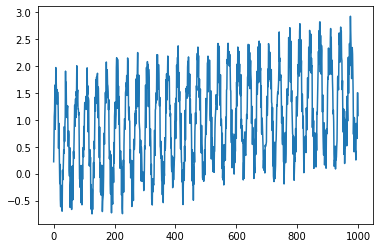

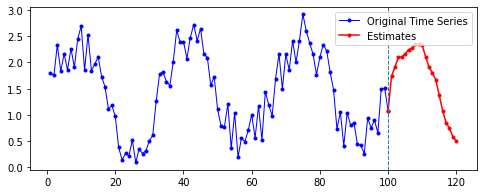

In [36]:
# module import
import numpy as np
from tensorflow.keras.layers import Input, Dense, LSTM, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# create Data
def createData(X_data, step):
    m = np.arange(len(X_data) - step)

    x, y = [], []
    for i in m:
        a = X_data[i:i+step]
        x.append(a)
        b = X_data[i+1:i+1+step]
        y.append(b[-1])

    X = np.array(x).reshape([len(m), step, 1])
    Y = np.array(y).reshape([len(m), 1])
    return X, Y

# 시계열 sine 데이터 생성
data = np.arange(1001)*0.001 + np.sin(2*np.pi*0.03*np.arange(1001)) + np.random.random(1001)
plt.plot(data)

# 파라미터 설정
n_input = 1 # input feature
n_output = 1 # output feature
n_step = int(input('시계열 step 주기를 설정하세요: '))
n_hidden = int(input('FFN 히든 뉴런의 개수를 설정하세요: '))

# 학습 데이터 생성
x, y = createData(data, n_step)

# LSTM 모델 생성
x_Input = Input(batch_shape=(None, n_step, n_input))
x_Lstm = Bidirectional(LSTM(n_hidden), merge_mode='ave')(x_Input)
y_output = Dense(n_output)(x_Lstm)
model = Model(x_Input, y_output)
latent = Model(x_Input, x_Lstm)
latent_feature = latent.predict(x[0].reshape(1, 20, 1))
print(f"latent feature 확인: {latent_feature}") # (1, 100)이 된다. 

model.compile(loss='mse', optimizer=Adam(lr=0.01))
print(model.summary())

# 학습
EPOCHS = int(input('학습 횟수를 설정하세요.: '))
BATCH = int(input('배치 사이즈를 설정하세요.: '))

hist = model.fit(x, y,
                 epochs=EPOCHS,
                 shuffle=True,
                 batch_size=BATCH)

# 예측
n_future = int(input('예측하고자 하는 기간을 설정하세요.: '))

# 마지막 100개 데이터 활용
if len(data) > 100:
    last_data = np.copy(data[-100:])
else:
    last_data = np.copy(data)

X_pred = np.copy(last_data)
estimate = [X_pred[-1]]

# 예측
for _ in range(n_future):
    x = X_pred[-n_step:].reshape(1, n_step, 1) # 마지막에 들어가기 위해서
    y_hat = model.predict(x)[0][0]
    estimate.append(y_hat)
    X_pred = np.insert(X_pred, len(X_pred), y_hat)

    ax1 = np.arange(1, len(last_data)+1)
ax2 = np.arange(len(last_data), len(last_data) + len(estimate))
plt.figure(figsize=(8, 3))
plt.plot(ax1, last_data, 'b-o', color='blue', markersize=3, label='Original Time Series', linewidth=1)
plt.plot(ax2, estimate, 'b-o', color='red', markersize=3, label='Estimates')
plt.axvline(x=ax1[-1], linestyle='dashed', linewidth=1)
plt.legend()
plt.show()